### Install & load packages

In [1]:
options(stringsAsFactors=F, warn=-1)

devtools::install_github('NEONScience/NEON-utilities/neonUtilities', ref='eddy')
library(neonUtilities)

Skipping install of 'neonUtilities' from a github remote, the SHA1 (958412d2) has not changed since last install.
  Use `force = TRUE` to force installation


Get some eddy flux data.

In [21]:
zipsByProduct(dpID="DP4.00200.001", package="basic", 
              site=c("NIWO", "HARV"), startdate="2018-06", enddate="2018-07",
              savepath="/Users/clunch/Desktop", check.size=F)

  |======================================================================| 100%
4 files downloaded to /Users/clunch/Desktop/filesToStack00200


Pull out the Level 4 data:

In [2]:
flux <- stackEC(filepath="/Users/clunch/Desktop/filesToStack00200/", level="dp04")

Extracting data
  |======================================================================| 100%
Stacking data tables by month
  |======================================================================| 100%
Joining data variables
  |======================================================================| 100%


In [3]:
head(flux$NIWO)

timeBgn,timeEnd,data.fluxCo2.nsae.flux,data.fluxCo2.stor.flux,data.fluxCo2.turb.flux,data.fluxH2o.nsae.flux,data.fluxH2o.stor.flux,data.fluxH2o.turb.flux,data.fluxMome.turb.veloFric,data.fluxTemp.nsae.flux,⋯,data.foot.stat.veloFric,data.foot.stat.distZaxsMeasDisp,data.foot.stat.distZaxsRgh,data.foot.stat.distZaxsAbl,data.foot.stat.distXaxs90,data.foot.stat.distXaxsMax,data.foot.stat.distYaxs90,qfqm.fluxCo2.stor.qfFinl,qfqm.fluxH2o.stor.qfFinl,qfqm.fluxTemp.stor.qfFinl
2018-06-01T00:00:00.000Z,2018-06-01T00:29:59.000Z,0.1111935,-0.06191186,0.1731053,19.401824,3.2511265,16.150697,0.19707045,4.1712006,⋯,0.2,8.34,0.03221479,1000,333.60,133.44,25.02,1,1,0
2018-06-01T00:30:00.000Z,2018-06-01T00:59:59.000Z,0.9328922,0.08534117,0.8475510,10.444936,-1.1768333,11.621770,0.19699723,-0.9163691,⋯,0.2,8.34,0.33007082,1000,258.54,108.42,50.04,1,1,0
2018-06-01T01:00:00.000Z,2018-06-01T01:29:59.000Z,0.4673682,0.02177216,0.4455960,5.140617,-4.3112673,9.451884,0.06518208,-2.9814957,⋯,0.2,8.34,0.12876068,1000,308.58,125.10,58.38,1,1,0
2018-06-01T01:30:00.000Z,2018-06-01T01:59:59.000Z,0.7263614,0.24944366,0.4769178,9.017467,0.1980776,8.819389,0.12964000,-13.3556222,⋯,0.2,8.34,0.83400000,1000,208.50,83.40,75.06,1,1,0
2018-06-01T02:00:00.000Z,2018-06-01T02:29:59.000Z,0.4740572,0.22524363,0.2488136,3.180386,0.1316297,3.048756,0.17460706,-5.3406503,⋯,0.2,8.34,0.83400000,1000,208.50,83.40,66.72,1,1,0
2018-06-01T02:30:00.000Z,2018-06-01T02:59:59.000Z,0.8807022,0.07078007,0.8099221,4.398761,-0.2989443,4.697706,0.10477970,-7.2739206,⋯,0.2,8.34,0.83400000,1000,208.50,83.40,41.70,1,1,0


What do all of these variable names mean?

(Note objDesc is extremely incomplete)

In [12]:
vars <- unique(unlist(strsplit(names(flux$NIWO), split=".", fixed=T)))
flux$variables[which(flux$variables$Object %in% vars),]

,Object,Description
138,angZaxsErth,Wind direction
171,data,Represents data fields
343,qfFinl,"The final quality flag indicating if the data are valid for the given aggregation period (1=fail, 0=pass)"
420,qfqm,"Quality flag and quality metrics, represents quality flags and quality metrics that accompany the provided data"
604,timeBgn,The beginning time of the aggregation period
605,timeEnd,The end time of the aggregation period


Before we can plot anything, need to covert the time stamps to a recongnized date-time format. Let's work with the Niwot data.

In [4]:
timeBgn <- substring(flux$NIWO$timeBgn, 1, nchar(flux$NIWO$timeBgn)-4)
timeBgn <- strptime(timeBgn, format="%Y-%m-%dT%H:%M:%S")

timeEnd <- substring(flux$NIWO$timeEnd, 1, nchar(flux$NIWO$timeEnd)-4)
timeEnd <- strptime(timeEnd, format="%Y-%m-%dT%H:%M:%S")

timeBgn <- as.POSIXct(timeBgn)
timeEnd <- as.POSIXct(timeEnd)

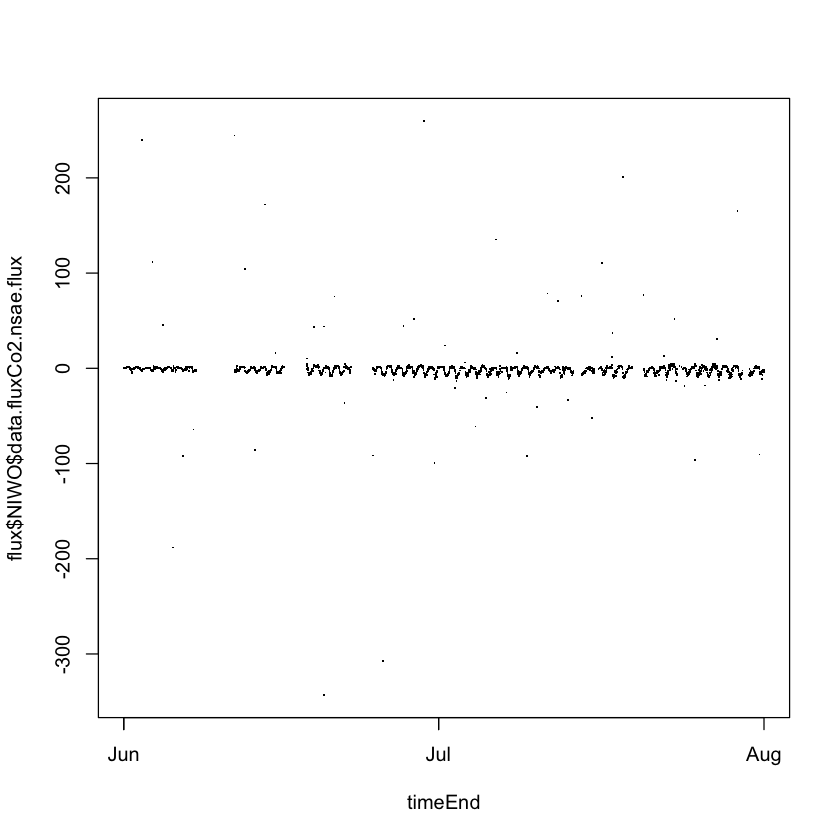

In [5]:
plot(flux$NIWO$data.fluxCo2.nsae.flux~timeEnd, pch=".")

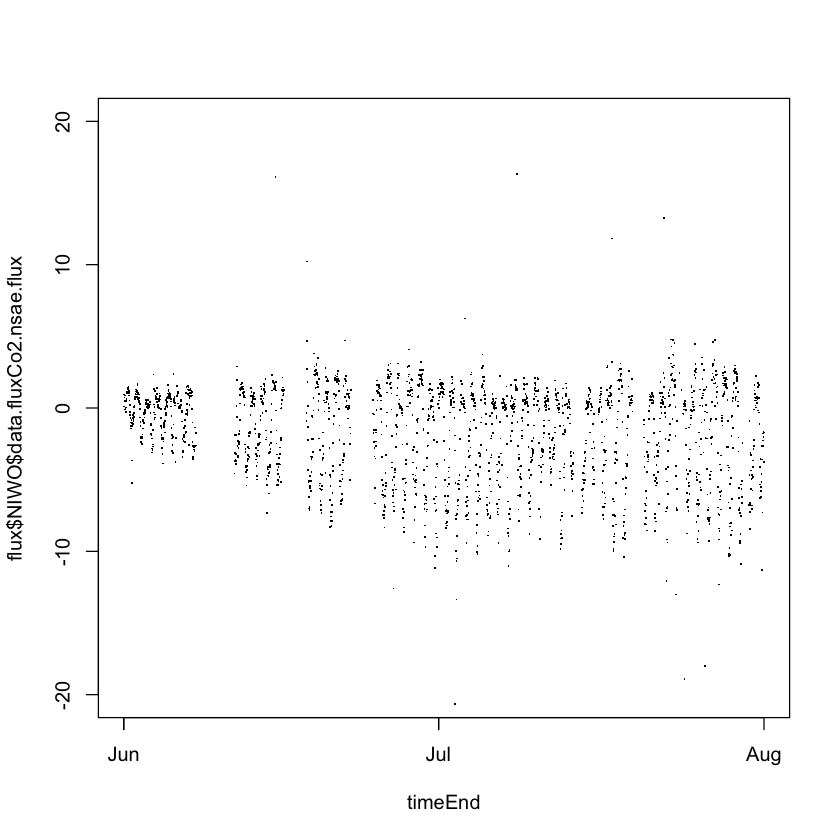

In [31]:
plot(flux$NIWO$data.fluxCo2.nsae.flux~timeEnd, pch=".", ylim=c(-20,20))

In [32]:
names(flux$NIWO)

[1] "timeBgn"                         "timeEnd"                        
 [3] "data.fluxCo2.nsae.flux"          "data.fluxCo2.stor.flux"         
 [5] "data.fluxCo2.turb.flux"          "data.fluxH2o.nsae.flux"         
 [7] "data.fluxH2o.stor.flux"          "data.fluxH2o.turb.flux"         
 [9] "data.fluxMome.turb.veloFric"     "data.fluxTemp.nsae.flux"        
[11] "data.fluxTemp.stor.flux"         "data.fluxTemp.turb.flux"        
[13] "data.foot.stat.angZaxsErth"      "data.foot.stat.distReso"        
[15] "data.foot.stat.veloYaxsHorSd"    "data.foot.stat.veloZaxsHorSd"   
[17] "data.foot.stat.veloFric"         "data.foot.stat.distZaxsMeasDisp"
[19] "data.foot.stat.distZaxsRgh"      "data.foot.stat.distZaxsAbl"     
[21] "data.foot.stat.distXaxs90"       "data.foot.stat.distXaxsMax"     
[23] "data.foot.stat.distYaxs90"       "qfqm.fluxCo2.stor.qfFinl"       
[25] "qfqm.fluxH2o.stor.qfFinl"        "qfqm.fluxTemp.stor.qfFinl"

In [33]:
names(flux$HARV)

[1] "timeBgn"                         "timeEnd"                        
 [3] "data.fluxCo2.nsae.flux"          "data.fluxCo2.stor.flux"         
 [5] "data.fluxCo2.turb.flux"          "data.fluxH2o.nsae.flux"         
 [7] "data.fluxH2o.stor.flux"          "data.fluxH2o.turb.flux"         
 [9] "data.fluxMome.turb.veloFric"     "data.fluxTemp.nsae.flux"        
[11] "data.fluxTemp.stor.flux"         "data.fluxTemp.turb.flux"        
[13] "data.foot.stat.angZaxsErth"      "data.foot.stat.distReso"        
[15] "data.foot.stat.veloYaxsHorSd"    "data.foot.stat.veloZaxsHorSd"   
[17] "data.foot.stat.veloFric"         "data.foot.stat.distZaxsMeasDisp"
[19] "data.foot.stat.distZaxsRgh"      "data.foot.stat.distZaxsAbl"     
[21] "data.foot.stat.distXaxs90"       "data.foot.stat.distXaxsMax"     
[23] "data.foot.stat.distYaxs90"       "qfqm.fluxCo2.stor.qfFinl"       
[25] "qfqm.fluxH2o.stor.qfFinl"        "qfqm.fluxTemp.stor.qfFinl"

ERROR: Error in plot.window(...): need finite 'xlim' values


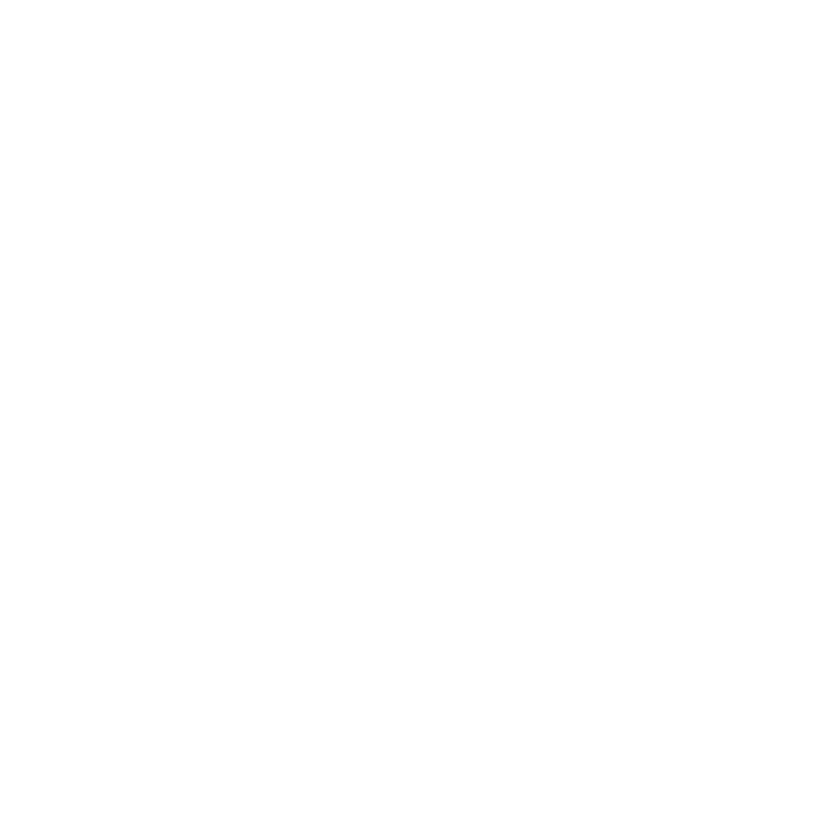

In [34]:
plot(flux$NIWO$data.fluxCo2.nsae.flux[which(flux$NIWO$qfqm.fluxCo2.stor.qfFinl==0)]~
     timeEnd[which(flux$NIWO$qfqm.fluxCo2.stor.qfFinl==0)], pch=".", ylim=c(-20,20))

In [36]:
min(flux$NIWO$qfqm.fluxCo2.stor.qfFinl)
max(flux$NIWO$qfqm.fluxCo2.stor.qfFinl)

min(flux$HARV$qfqm.fluxCo2.stor.qfFinl)
max(flux$HARV$qfqm.fluxCo2.stor.qfFinl)

[1] 1

[1] 1

[1] 0

[1] 1

In [11]:
timeBgn <- substring(flux$HARV$timeBgn, 1, nchar(flux$HARV$timeBgn)-4)
timeBgn <- strptime(timeBgn, format="%Y-%m-%dT%H:%M:%S")

timeEnd <- substring(flux$HARV$timeEnd, 1, nchar(flux$HARV$timeEnd)-4)
timeEnd <- strptime(timeEnd, format="%Y-%m-%dT%H:%M:%S")

timeBgn <- as.POSIXct(timeBgn)
timeEnd <- as.POSIXct(timeEnd)

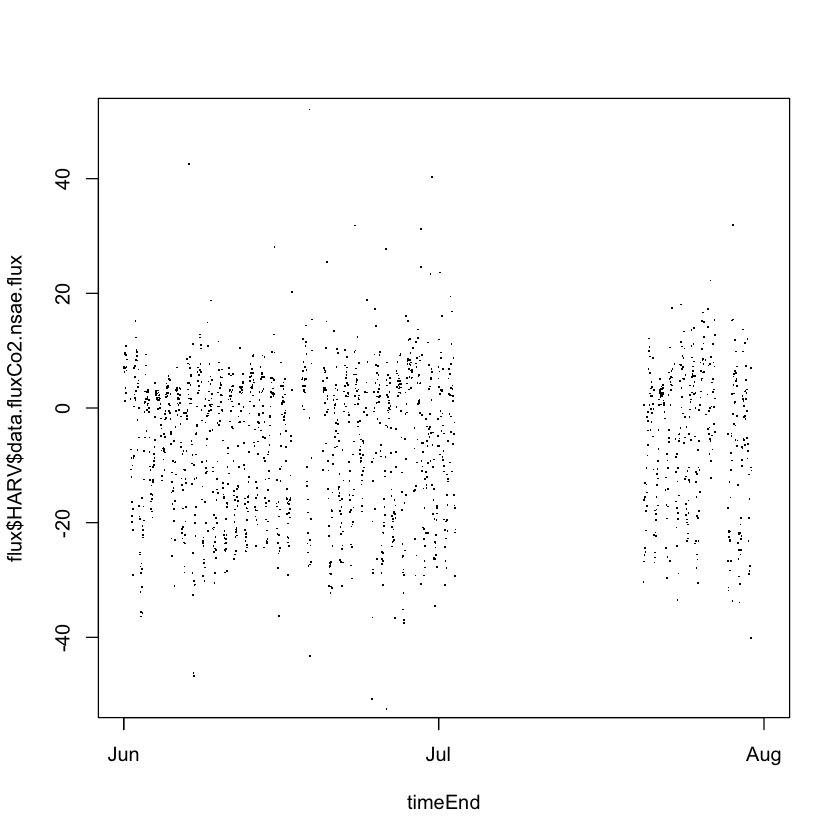

In [12]:
plot(flux$HARV$data.fluxCo2.nsae.flux~timeEnd, pch=".", ylim=c(-50,50))

Let's bring together with some other IS data

In [14]:
pr <- loadByProduct("DP1.00024.001", package="basic", check.size=F,
                   site="HARV", startdate="2018-06", enddate="2018-07")

  |======================================================================| 100%

Unpacking zip files
  |======================================================================| 100%
Stacking table PARPAR_1min
  |======================================================================| 100%
Stacking table PARPAR_30min
  |======================================================================| 100%
Finished: All of the data are stacked into 2 tables!
Copied the first available variable definition file to /stackedFiles and renamed as variables.csv
Stacked PARPAR_1min which has 527040 out of the expected 527040 rows (100%).
Stacked PARPAR_30min which has 17568 out of the expected 17568 rows (100%).
Stacking took 8.592517 secs
All unzipped monthly data folders have been removed.


In [15]:
head(pr$PARPAR_30min)

domainID,siteID,horizontalPosition,verticalPosition,startDateTime,endDateTime,PARMean,PARMinimum,PARMaximum,PARVariance,⋯,PARStdErMean,PARFinalQF,outPARMean,outPARMinimum,outPARMaximum,outPARVariance,outPARNumPts,outPARExpUncert,outPARStdErMean,outPARFinalQF
D01,HARV,0,10,2018-06-01T00:00:00Z,2018-06-01T00:30:00Z,-0.42,-0.67,-0.09,0.01,⋯,0,0,NA,NA,NA,NA,NA,NA,NA,NA
D01,HARV,0,10,2018-06-01T00:30:00Z,2018-06-01T01:00:00Z,-0.53,-0.70,-0.38,0.00,⋯,0,0,NA,NA,NA,NA,NA,NA,NA,NA
D01,HARV,0,10,2018-06-01T01:00:00Z,2018-06-01T01:30:00Z,-0.53,-0.67,-0.41,0.00,⋯,0,0,NA,NA,NA,NA,NA,NA,NA,NA
D01,HARV,0,10,2018-06-01T01:30:00Z,2018-06-01T02:00:00Z,-0.54,-0.67,-0.41,0.00,⋯,0,0,NA,NA,NA,NA,NA,NA,NA,NA
D01,HARV,0,10,2018-06-01T02:00:00Z,2018-06-01T02:30:00Z,-0.54,-0.67,-0.38,0.00,⋯,0,0,NA,NA,NA,NA,NA,NA,NA,NA
D01,HARV,0,10,2018-06-01T02:30:00Z,2018-06-01T03:00:00Z,-0.54,-0.67,-0.41,0.00,⋯,0,0,NA,NA,NA,NA,NA,NA,NA,NA


In [25]:
pr.top <- pr$PARPAR_30min[which(pr$PARPAR_30min$verticalPosition==max(pr$PARPAR_30min$verticalPosition)),]
startDT <- strptime(pr.top$startDateTime, format="%Y-%m-%dT%H:%M:%SZ")
startDT <- as.POSIXct(startDT)

In [26]:
pr.top <- cbind(startDT, pr.top)

tStart <- timeBgn
flux$HARV <- cbind(tStart, flux$HARV)

In [30]:
fx.pr <- merge(pr.top, flux$HARV, by.x='startDT', by.y="tStart")

In [32]:
head(fx.pr)

startDT,domainID,siteID,horizontalPosition,verticalPosition,startDateTime,endDateTime,PARMean,PARMinimum,PARMaximum,⋯,data.foot.stat.veloFric,data.foot.stat.distZaxsMeasDisp,data.foot.stat.distZaxsRgh,data.foot.stat.distZaxsAbl,data.foot.stat.distXaxs90,data.foot.stat.distXaxsMax,data.foot.stat.distYaxs90,qfqm.fluxCo2.stor.qfFinl,qfqm.fluxH2o.stor.qfFinl,qfqm.fluxTemp.stor.qfFinl
2018-06-01 00:00:00,D01,HARV,0,60,2018-06-01T00:00:00Z,2018-06-01T00:30:00Z,4.75,0.84,14.45,⋯,0.5700890,24.98,2.498,1000,400,180,120,1,1,0
2018-06-01 00:30:00,D01,HARV,0,60,2018-06-01T00:30:00Z,2018-06-01T01:00:00Z,0.59,0.34,1.04,⋯,0.4962208,24.98,2.498,1000,400,180,120,1,1,0
2018-06-01 01:00:00,D01,HARV,0,60,2018-06-01T01:00:00Z,2018-06-01T01:30:00Z,0.50,0.34,0.71,⋯,0.5169966,24.98,2.498,1000,400,180,120,1,1,0
2018-06-01 01:30:00,D01,HARV,0,60,2018-06-01T01:30:00Z,2018-06-01T02:00:00Z,0.50,0.31,0.71,⋯,0.6651491,24.98,2.498,1000,420,180,120,1,1,0
2018-06-01 02:00:00,D01,HARV,0,60,2018-06-01T02:00:00Z,2018-06-01T02:30:00Z,0.48,0.27,0.64,⋯,0.4556596,24.98,2.498,1000,380,160,120,1,1,0
2018-06-01 02:30:00,D01,HARV,0,60,2018-06-01T02:30:00Z,2018-06-01T03:00:00Z,0.48,0.31,0.67,⋯,0.5815246,24.98,2.498,1000,400,180,120,1,1,0


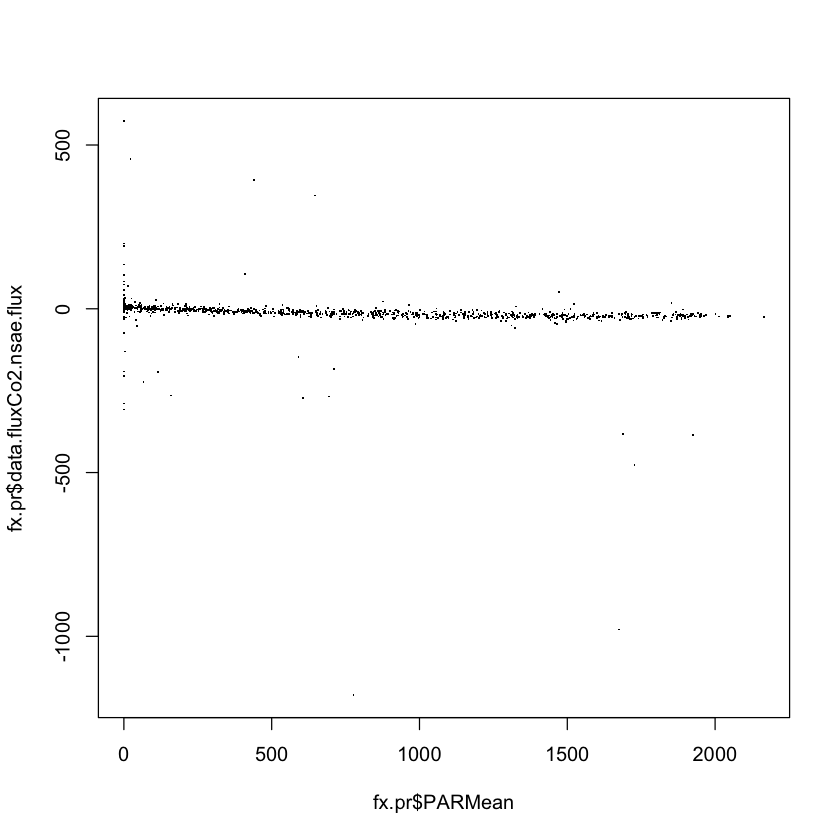

In [33]:
plot(fx.pr$data.fluxCo2.nsae.flux~fx.pr$PARMean, pch=".")

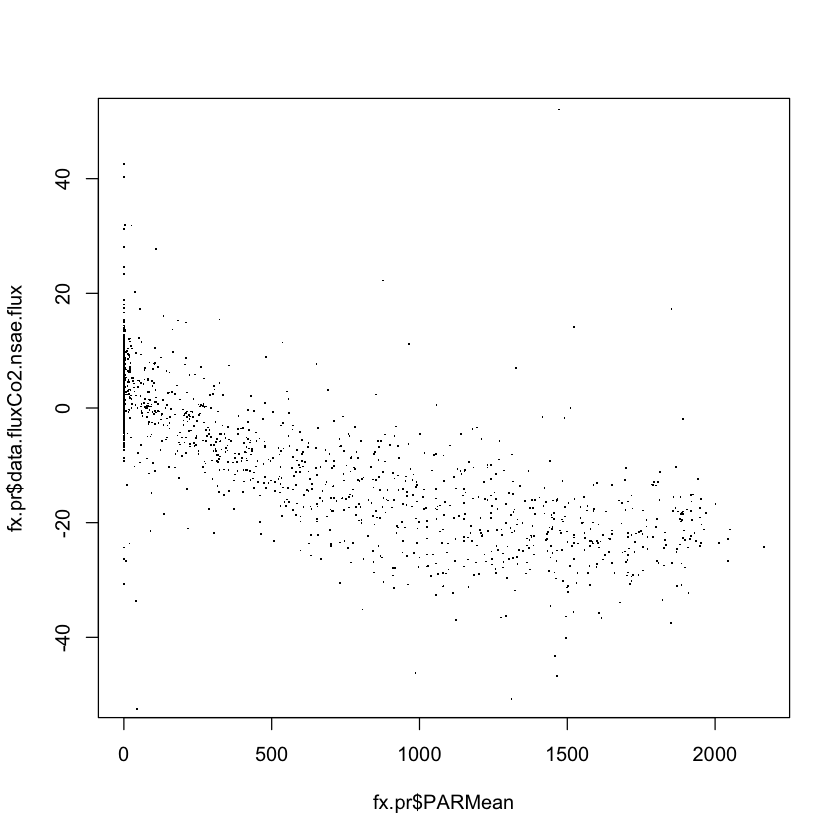

In [34]:
plot(fx.pr$data.fluxCo2.nsae.flux~fx.pr$PARMean, pch=".", 
    ylim=c(-50,50))